In [119]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import csv
import StringIO
import requests
import zipfile

%pylab inline

#if os.getenv ('PUI2016') is None:
    #print ("Must set env variable PUI2016")
#if os.getenv ('PUIDATA') is None:
    #print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [120]:
PUI2016 = os.getenv('PUI2016')
print(PUI2016)

/home/cusp/kk3374/PUI2016


# Idea_1:
Citi Bikes are used to commute.

# Null Hypothesis:
The average number of trips during the weekdays is the same or less than the average number of trips on the weekend days. 

H0: trip count on Monday, Tuesday, Wednesday, Thursday, and Friday = trip count on Saturday and Sunday


# Alternative Hypothesis:
The average number of trips during the weekdays is greater than the average number of trips on the weekend days. 

H0: trip count on Monday, Tuesday, Wednesday, Thursday, and Friday >= trip count on Saturday and Sunday

# Significance Level:
I choose a significance level of .05, meaning I want the probability of getting a result as significant as mine to be less than 5%. 

# Idea_2:
More time is spent on Citi Bikes for commuting on the weekdays than for transportation on the weekends.

# Null Hypothesis:
The average time spent on Citi Bikes on Monday - Friday is the same or less than the average time spent on bikes on Saturday and Sunday.

HO: average trip duration Monday, Tuesday, Wednesday, Thursday, and Friday <= average trip duration on Saturday an Sunday

# Alternative Hypothesis:
The average time spent on Citi Bikes on Monday - Friday is greater than the average time spent on bikes on Saturday and Sunday.

HO: average trip duration Monday, Tuesday, Wednesday, Thursday, and Friday > average trip duration on Saturday an Sunday

In [121]:
#http://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe
#http://stackoverflow.com/questions/9419162/python-download-returned-zip-file-from-url
#add component about 'if file already exists, don't recreate it'
datestring = '201603'
r = requests.get("https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip") 
z = zipfile.ZipFile(StringIO.StringIO(r.content))
citi_csv = z.extractall(PUI2016)
citi_df = pd.read_csv(PUI2016 + "/" + datestring + "-citibike-tripdata.csv")
citi_df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72,W 52 St & 11 Ave,40.767272,-73.993929,427,Bus Slip & State St,40.701907,-74.013942,23914,Subscriber,1982.0,1
1,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72,W 52 St & 11 Ave,40.767272,-73.993929,254,W 11 St & 6 Ave,40.735324,-73.998004,23697,Subscriber,1978.0,1
2,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72,W 52 St & 11 Ave,40.767272,-73.993929,493,W 45 St & 6 Ave,40.756800,-73.982912,21447,Subscriber,1960.0,2
3,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,22351,Subscriber,1986.0,1
4,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72,W 52 St & 11 Ave,40.767272,-73.993929,151,Cleveland Pl & Spring St,40.722104,-73.997249,20985,Subscriber,1978.0,1
5,859,3/1/2016 07:33:46,3/1/2016 07:48:06,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,15557,Subscriber,1975.0,1
6,538,3/1/2016 07:36:31,3/1/2016 07:45:29,72,W 52 St & 11 Ave,40.767272,-73.993929,533,Broadway & W 39 St,40.752996,-73.987216,22638,Subscriber,1993.0,1
7,1255,3/1/2016 07:38:14,3/1/2016 07:59:10,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,23864,Subscriber,1988.0,2
8,1216,3/1/2016 07:57:05,3/1/2016 08:17:21,72,W 52 St & 11 Ave,40.767272,-73.993929,325,E 19 St & 3 Ave,40.736245,-73.984738,17821,Subscriber,1982.0,1
9,280,3/1/2016 08:01:30,3/1/2016 08:06:11,72,W 52 St & 11 Ave,40.767272,-73.993929,500,Broadway & W 51 St,40.762288,-73.983362,21458,Subscriber,1982.0,1


In [122]:
citi_df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [123]:
times_duration = citi_df.drop(citi_df.columns[4:], axis=1)
times_duration.head()

,tripduration,starttime,stoptime,start station id
0,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72
1,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72
2,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72
3,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72
4,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72


In [124]:
#convert 'starttime' from 'RangeIndex' to 'TimeSeriesIndex'
test_times_duration = citi_df.drop(citi_df.columns[4:], axis=1)
start_series = test_times_duration['starttime']
start_time_indexed = pd.to_datetime(start_series.tolist())

In [125]:
print(start_time_indexed[:5])

DatetimeIndex(['2016-03-01 06:52:42', '2016-03-01 07:05:50',
               '2016-03-01 07:15:05', '2016-03-01 07:26:04',
               '2016-03-01 07:31:30'],
              dtype='datetime64[ns]', freq=None)


In [126]:
print(type(start_time_indexed))

<class 'pandas.tseries.index.DatetimeIndex'>


In [127]:
df1 = times_duration[['tripduration', 'start station id']]
df2 = df1.set_index(start_time_indexed)
df2.head()
print(len(df2))

919921


In [128]:
#groupby day and sum the values inside trip duration
#http://benalexkeen.com/resampling-time-series-data-with-pandas/
daily_summary = pd.DataFrame()
daily_summary['tripdurationsum'] = df2.tripduration.resample('D').sum()
daily_summary['tripcount'] = df2.tripduration.resample('D').count()
daily_summary['meantripduration'] = daily_summary['tripdurationsum'] / daily_summary['tripcount']
daily_summary.head()

,tripdurationsum,tripcount,meantripduration
2016-03-01,27686389,30509,907.482677
2016-03-02,21268277,26195,811.921245
2016-03-03,19179849,24061,797.134325
2016-03-04,13195190,17369,759.697737
2016-03-05,18110768,18023,1004.869778


In [129]:
daily_mean = pd.DataFrame()
daily_mean['meantripduration'] = daily_summary['meantripduration']
#daily_mean['tripcount'] = daily_summary['tripcount']
daily_mean.head()

,meantripduration
2016-03-01,907.482677
2016-03-02,811.921245
2016-03-03,797.134325
2016-03-04,759.697737
2016-03-05,1004.869778


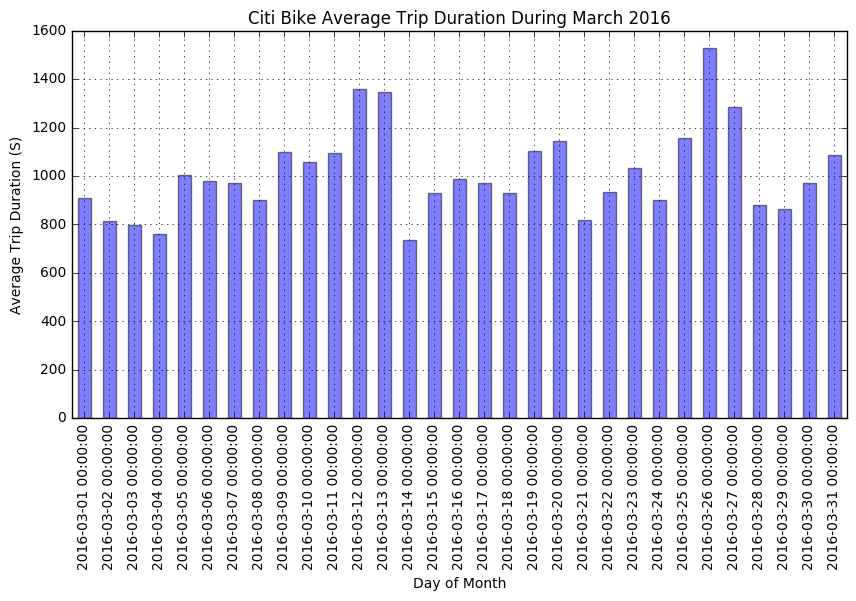

In [130]:
#http://stackoverflow.com/questions/18237453/pandas-data-frame-plotting
fig = pl.figure(figsize=(10,5))
daily_mean.plot(ax=fig.gca(), kind='bar', alpha=0.5, legend=False, grid=True)
pl.title('Citi Bike Average Trip Duration During March 2016')
pl.xlabel('Day of Month')
pl.ylabel('Average Trip Duration (S)')

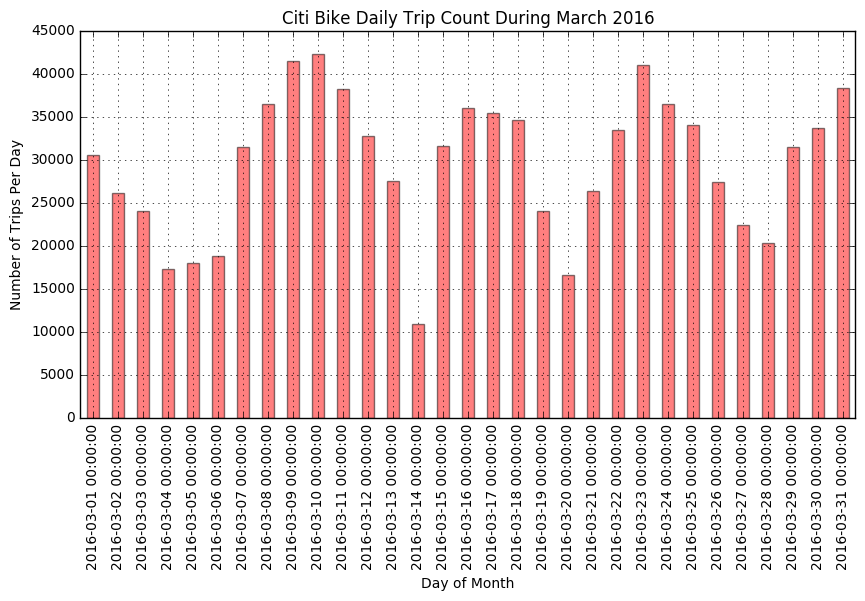

In [131]:
trip_count = pd.DataFrame()
trip_count['tripcount'] = daily_summary['tripcount']
fig = pl.figure(figsize=(10,5))
trip_count.plot(ax=fig.gca(), kind='bar', alpha=0.5, color='r', legend=False, grid=True)
pl.title('Citi Bike Daily Trip Count During March 2016')
pl.xlabel('Day of Month')
pl.ylabel('Number of Trips Per Day')